# <center> <h1>   🎮  🧑‍💻  🕹

# <center> Mario ga o'yin o'ynashni o'rgatamiz. 🎮

<center>

# 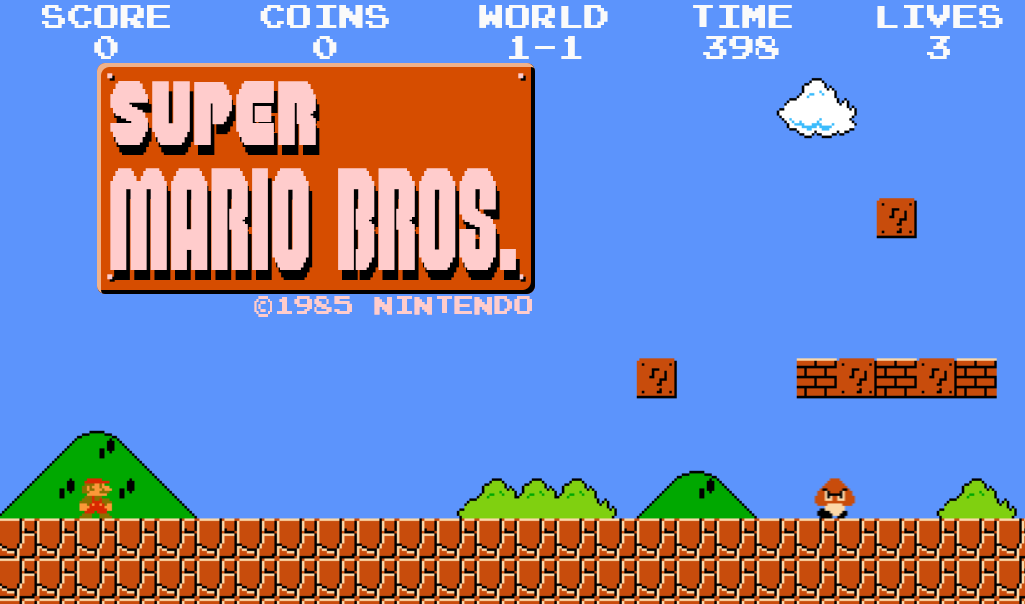

In [ ]:
# !pip install gym_super_mario_bros==7.3.0 nes_py

In [2]:
# Demak biz 1-bo'lib gym-super-mario-bros o'rnatib olamiz. Bu bizga marioni pythonda o'ynash imkonini beradigan kutubxona
# 2-bo'lib nes-py ni o'rnatib olamiz, bu esa bizga pythonda virtual jyostik yaratish uchun kerak bo'ladi
# bularning hammasi open gym-openai freamvorki asosida yaratilgan


In [1]:
# O'yinni chaqirib olmamiz
import gym_super_mario_bros
# Jostikni chaqirib olamiz
from nes_py.wrappers import JoypadSpace
# O'yinni boshqarish (osonroq kompanentlar) komponentalarini chaqiramiz
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT
# Demak marioda 7 xil harakatni amalga oshirishi mumkin
# NOOP - hech nima qilmaslik
# right - o'nga yurish
# right - o'nga yurish va A(sakrash)
# right - o'nga yurish va B(otish)
# right - o'nga yurish va A(sakrash) va B(otish)
# A(sakrash)
# left - chapga yurish

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# O'yimiizni dastlabki sozlamalari
env = gym_super_mario_bros.make("SuperMarioBros-v0", apply_api_compatibility=True, render_mode="human")  #SuperMarioBros 0 versiyasi uchun muhit(environment) yaratib olamiz
env
# apply_api_compatibility - True turli xildagi gym versiyalar bilan ishlash uchun kerak bo'ladi. 
# render_mode="human" - o'yin render bo'lganda ya'ni ishga tushganda bizga(human ga) ko'rinishi kerakligi uchunn ishlatamiz.



D:\IT\Python\Mario\mario\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
D:\IT\Python\Mario\mario\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


<TimeLimit<OrderEnforcing<PassiveEnvChecker<EnvCompatibility<SuperMarioBrosEnv<SuperMarioBros-v0>>>>>>

In [4]:
env.action_space
# 256 xil knopkalarni kombinatsiyasi borligini ko'rishimiz mumkin
# agar biz buning hammasini ishlatsak bizning modelimizning o'rganishi judaham ko'p vaqtni oladi(ham o'rganish qiyin bo'ladi)


Discrete(256)

In [5]:
env = JoypadSpace(env, SIMPLE_MOVEMENT) # environment ga jostikimizni ulab olamiz


In [6]:
env.action_space
# endi biz komnitasiyalarimizni 7 taga tushirib oldik

Discrete(7)

In [7]:
env.observation_space.shape
# oyinimizni kadr o'lchamini ko'rishimiz mumkin


(240, 256, 3)

In [8]:
env.action_space.sample()
# random harakatni oladi

3

In [9]:
SIMPLE_MOVEMENT[env.action_space.sample()]
# random harakatlar

['right', 'A', 'B']

In [10]:
# E'TIBORLI BO'LING
# Pastdagi yacheykada e'tibor bering bizda o'yin uchun oyna ochiladi va oyinning o'zi random harakatlar orqali o'ynaydi
# biz osha oynadan birdaniga chiqib ketmaymiz birinchi bo'lib notebookdagi to'xtatish tugmasini bosamiz (kvadratni)
# va ochilgan oyna ichida o'yin to'xtaydi, keyin biz undan ham pastroqdagi kodlarni ishlatamiz va shundan keyingina env.close() orqali oynani to'liq yopamiz 
# agar o'yinni darxol env.close() deb to'xtatsak oynamiz ham yopiladi va biz pastdagi kodlarni ishlata olmaymiz.


In [11]:
# demak o'zimizga o'zgaruvchi yaratib olamiz, bu bizga davom etish yoki to'xtatishni aniqlash uchun kerak
done = True

# O'yinni boshlaymiz
env.reset()

# O'yindagi har bir kadrni aylantiramiz
for step in range(100000):
    # random harakatlarni olamiz
    action = env.action_space.sample()
    # random harakatlarni bajaramiz
    state, reward, terminated, truncated, info = env.step(action)
    # ishlashini tekshirib boramiz
    done = terminated or truncated
    #print(done)

    if done:
       env.reset()
        
env.close()
# yacheykani notebookdagi knopka(kvadrat) orqali to'xtatganingizdan keyin xatolik chiqsa havotirga hojat yo'q

D:\IT\Python\Mario\mario\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
D:\IT\Python\Mario\mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

<center>

# 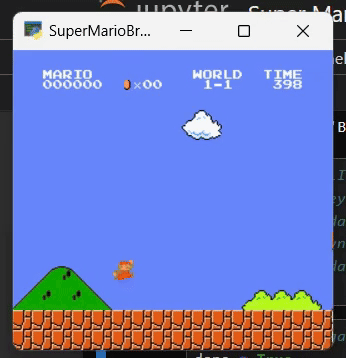

In [13]:
env.step(1)
# buni biz 1-kadr desak bo'ladi

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[228,  92,  16],
         [240, 208, 176],
         [240, 208, 176],
         ...,
         [240, 208, 176],
         [228,  92,  16],
         [228,  92,  16]],
 
        [[228,  92,  16],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [240, 208, 176],
         [228,  92,  16],
         [228,  92,  16]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [228,  92,  16],
  

In [15]:
env.step(2)
# 2-kadr

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [  0,   0,   0],
         [240, 208, 176],
         ...,
         [228,  92,  16],
         [240, 208, 176],
         [240, 208, 176]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [240, 208, 176],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [228,  92,  16]],
 
        [[  0,   0,   0],
         [228,  92,  16],
         [240, 208, 176],
         ...,
         [  0,   0,   0],
  

In [16]:
# Tepada biz 5 ta o'zgaruvchi olgan edik
# state, reward, terminated, truncated, info
# state bu holat oyinimizning holati, ya'ni bu bizning kadrimiz ya'ni 3 olchovli kadrimiz
env.step(1)[0].shape

(240, 256, 3)

In [17]:
# state, reward, terminated, truncated, info
# reward esa bu bizning mufofot yoki jarimamiz, bu bizning harakatimizga qarab o'zgaradi
# 1 bolsa mukofat 0 bo'lsa jarima
env.step(1)[1]
# pastdagi rasmga etibor bersangiz reward funksiyaning qanday ishlashi ko'rsatilgan

1.0

<center>
    
# 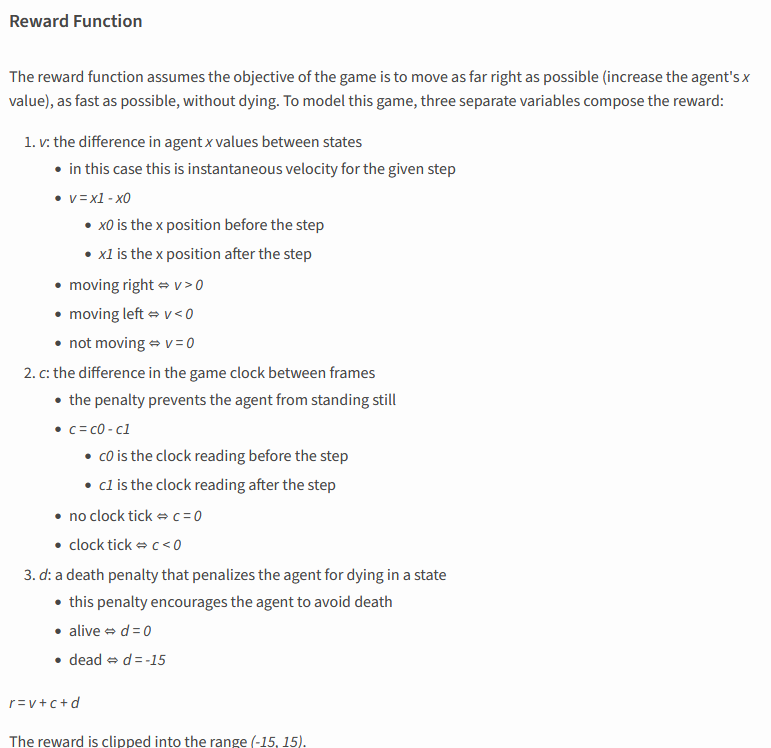

### <center> `Demak mukofot yoki jarimamiz (-15, 15) oralig'ida ekan`


## <center> <a href="https://pypi.org/project/gym-super-mario-bros/">Shunga o'xshash boshqa ma'lumotlari bilan tanishish uchun asosiy saytiga kiring. Shu yerga boshing</a>

In [18]:
# state, reward, terminated, truncated, info
#  terminated, esa oyinni korsatayotgan ekranni holati. (bu oyin tugaganini ham bildiradi)
env.step(1)[2]

False

In [19]:
# state, reward, terminated, truncated, info
#  truncated, asosan vaqt chegarasi. (bu oyin tugaganini ham bildiradi)
env.step(1)[3]

False

In [20]:
# state, reward, terminated, truncated, info
# info o'yin haqidagi ba'zi ma'lumotlarni beradi
env.step(1)[4]

{'coins': 0,
 'flag_get': False,
 'life': 1,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 393,
 'world': 1,
 'x_pos': 241,
 'x_pos_screen': 112,
 'y_pos': 79}

In [12]:
env.close()
# endi teparoqda ishga tushirgan o'yin oynamizni yopamiz

In [ ]:
# Endi pytorchni o'rnatib olamiz
# !pip install torch==1.7.0+cu110 torchvision==0.8.0+cu110 torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html
# hamma o'ziga kerakli versiyasini o'rnatadi(videokartasi ishlashi uchun)

In [22]:
# GrayScaleObservation bizda rasmlar 3 kannalik buni o'qitish bizga qiyin shuning uchun biz ularni Gray (kulrang) ya'ni 1 o'lchovli qilib olamiz
from gym.wrappers import GrayScaleObservation

In [ ]:
#!pip install stable-baselines3[extra]
# endi esa baselines3ni o'rntaib olamiz
# stable_baselines3 gym muhitida agentlarni yaratish va o'qitish uhun kerak bo'lgan kutubxona

In [23]:
# stable_baselines3 gym muhitida agentlarni yaratish va o'qitish uhun kerak bo'lgan kutubxona
# VecFrameStack - Kadrlarni taxlash uchun ishlatamiz
# DummyVecEnv -  Pythonda har bir muhitni ketma-ket chaqirib, bir nechta muhit uchun oddiy vektorli qobiq hosil qiladi. Bu bizga hisob kitoblarni tezroq
# amalga oshirish imkonini beradi. Oddiyroq aytadigan bo'lsak neyron to'riga o'qitish uchun frame(kadrlarni)larni batch qilib beradi.


from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt


In [24]:
env = gym_super_mario_bros.make("SuperMarioBros-v0", apply_api_compatibility=True, render_mode="human") # o'yinni yuklab olish
env = JoypadSpace(env, SIMPLE_MOVEMENT) # oddiy harakatlarni olish


D:\IT\Python\Mario\mario\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
D:\IT\Python\Mario\mario\lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [25]:
state = env.reset()

In [26]:
state[0].shape
# hozir bizda frame(kadr) 3 o'lchovli 

(240, 256, 3)

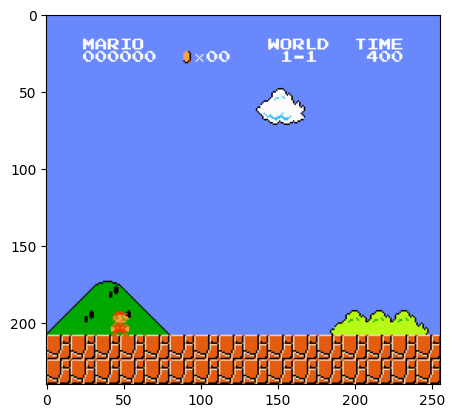

In [27]:
plt.imshow(state[0])

In [28]:
env = gym_super_mario_bros.make("SuperMarioBros-v0", apply_api_compatibility=True, render_mode="human") 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
# frame(kadrni) 1 o'lchovli qilib olamiz

In [29]:
state = env.reset()

In [30]:
state[0].shape
# frameni(kadrni) 1 olchoivli qilib oldik

(240, 256, 1)

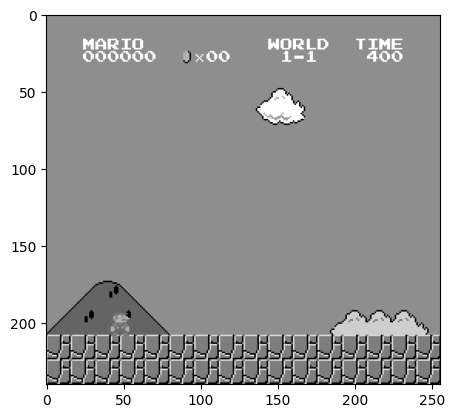

In [31]:
plt.imshow(state[0], cmap="gray")

In [32]:
env = gym_super_mario_bros.make("SuperMarioBros-v0", apply_api_compatibility=True, render_mode="human") 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
# kadrlarni batch qilib olamiz

D:\IT\Python\Mario\mario\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [33]:
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

In [34]:
state = env.reset()

In [35]:
state.shape
# endi bzinning rasmimiz boshqa bir massivnin ichida
# biz neyron tarmogiga shu korinishda beramiz

(1, 240, 256, 1)

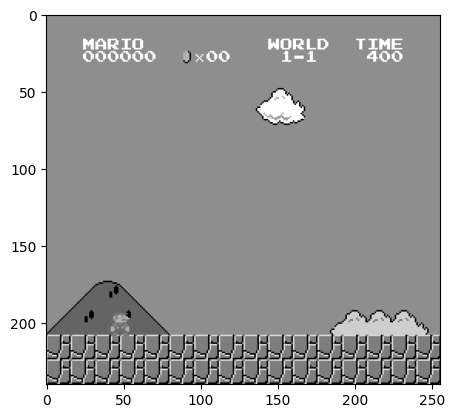

In [36]:
plt.imshow(state[0], cmap="gray")

In [37]:
env = gym_super_mario_bros.make("SuperMarioBros-v0", apply_api_compatibility=True, render_mode="human") 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order="last") # bir nechta kadrlarni qo'shamiz, masalan biz 4 ta kadrni qo'shyapmiz. channels_order oxiriga qoshamiz

In [38]:
state = env.reset()

In [39]:
state.shape
# endi biz 1, 240, 256, 4
# bu degani bizning 1-massivimizda framelarni o'lchami 240x256 va
# va unda 4 ta rasm bor degani

(1, 240, 256, 4)

In [40]:
state, reward, done, info = env.step([env.action_space.sample()])

D:\IT\Python\Mario\mario\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


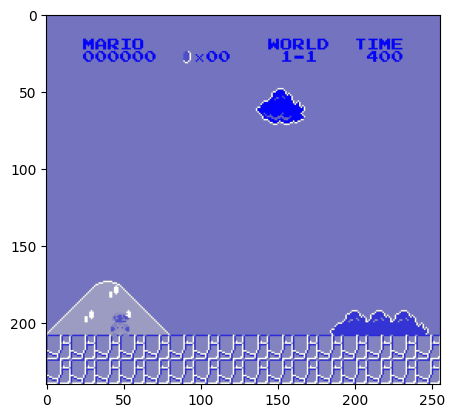

In [41]:
plt.imshow(state[0])
# bu yerda 4 xil usta ust tushgan kadr bor

In [47]:
state, reward, done, info = env.step([5])
# bu yacheykani 5-6 marta ishlatib keyin pastdagisini ishlatsangiz o'zgina bo'lsa ham rasmlardagi farqni ko'rishing mumkin bo'ladi

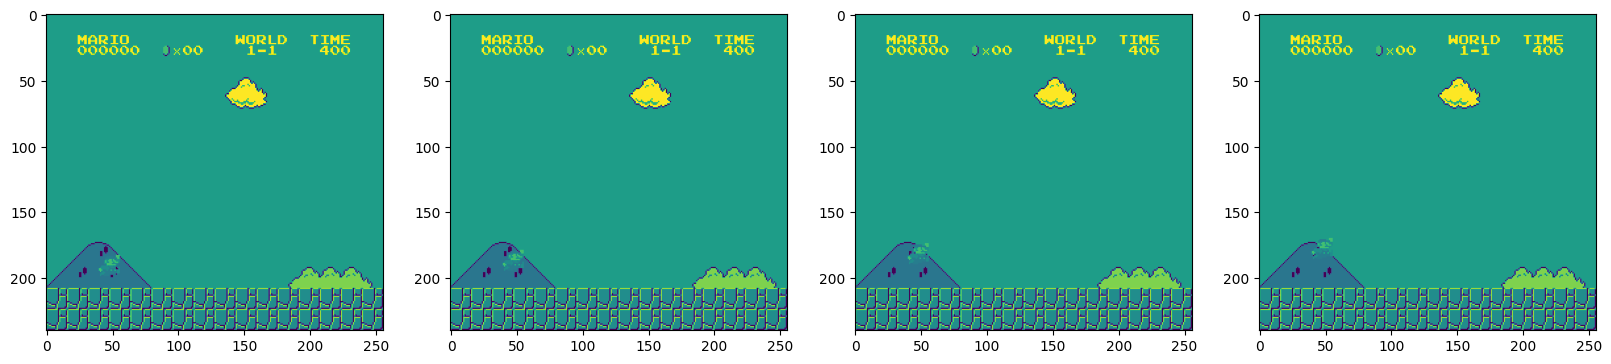

In [48]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()
# biz shu orqali o'yinizda harakat bor yoqligini tekshirishimz mumkin

In [49]:
# OS dagi pakalar bilan ishlash uchun pastdagi kutubxona kerak
import os

# PPO algoritmini chaqirib olamiz. Proximal Policy Optimization. Bu bizning asosimiz
# PPO - (Proksimal siyosatni optimallashtirish). O'yinda bizing agent ya'ni Mario atrof-muhit bilan o'zaro aloqada bo'ladi(ya'ni o'yinni ichida bo'ladi),
# va u turli harakatlarni sinab ko'radi va ular uchun mukofot oladi. 
# PPO agentning joriy strategiyasi (harakatlar ketma ketligi) qanchalik yaxshi ekanini tahlil qiladi va samaradorlikni oshirish uchun 
# kichik yaxshilanishlarni taklif qiladi.
# PPO o'qitishni qiyinlashtirmaslik uchun katta bo'lmagan o'zgarishlarni oladi.
from stable_baselines3 import PPO

# Callback larni chaqirib olamiz (modelni saqlash uchun ishlatamiz)
from stable_baselines3.common.callbacks import BaseCallback

<center>

# 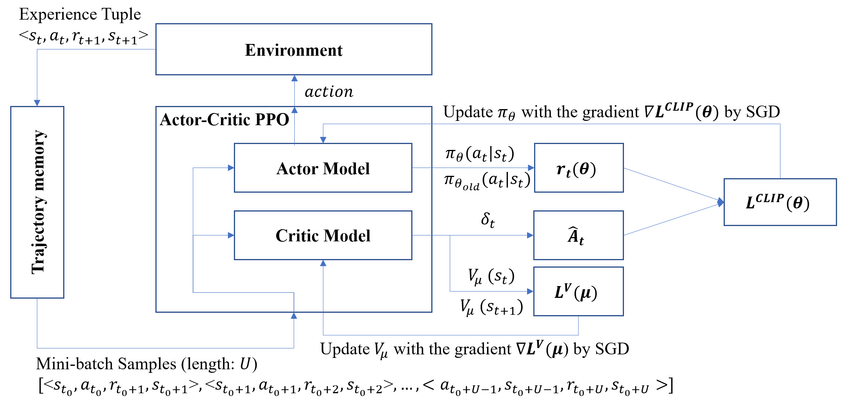

In [50]:
# har n qadamda modelni saqlab olish uchun class yaratib olamiz
class SaveModel(BaseCallback):

    def __init__(self, qadam, save_path, verbose=1):
        super(SaveModel, self).__init__(verbose)
        self.qadam = qadam
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.qadam == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True
    

In [51]:
CHECKPOINT_DIR = "./train/"  # o'qitgan modelimizni saqlab olish uchun papka
LOG_DIR = "./logs/" # log larimizni saqlab qo'yoihs uchun papka. Biz keyinchalik bu loglarni tensorboradda ochib ko'rsak bo'ladi

In [52]:
# qadam = har n ta qadamda modelni saqlash
callback = SaveModel(qadam=100000, save_path=CHECKPOINT_DIR)

In [53]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)
# CnnPolicy - Politikani turi. Cnn qanday ishlashini tushunadi. Bu agentning hatti-harakatlari strateiyasini ehitmollilari bilan ishlash uchun kerak.
# Oddiyroq aytadigan bo'lsak CnnPolicy bizga rasmlar bilan ishlash uchun kerak boladi.
# Bizda ham o'yinizmiz rasmlardan iborat.
# CnnPolicy dan boshqa MlpPlociy(bu ko'p darajali perseptron degani) ham bor u bizga  jadvallar bilan ishlayotgan bo'lsak kerak bo'ladi
#  To'liq ma'lumotni https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#ppo-policies  olishingiz mumkin 🙂


# verbose bu Tafsilotlar darajasi(Уровень детализации).  verbose=1 bu ishlatilayotgan muhit(environment) qurilmalar va boshqa kerak bo'lishi 
# mumkin bo'lgan ma'lumotni bizga beradi.
# Agar verbose = 0 bo'lsa hech qanday ma'lumot berilmaydi

# n_steps=512 neyronlarimizni har safar har bir muhit uchun update qilishimizdan oldin qilindagigan qadamlar soni
# oddiyroq aytadigan bo'lsak bu neyron to'rimizni update qilishimizdan oldin kutishimiz kerak bo'lgn kadrlar soni


Using cuda device
Wrapping the env in a VecTransposeImage.


# <center> Train model

In [16]:
# bu yecheykani markdown qiib qo'ydim chunki train jarayonida juda ko'p malumot chiqadi va uni github, kaggle va boshqa saytlarga qo'yganda juda noqulay
# bo'ladi.

# Train jarayoni 
# model.learn(total_timesteps=2000000, callback=callback)

# total_timesteps=1000000 bu degani har bir oyinda bizning sun'iy intelektimiz shuncha kadr ko'radi degani(agent har qanday muhit uchun bajaradigan
# jami qadamlar soni) har bir o'yinda degani bu bizning modelimiz o'ynaydi va va finishga yetib bora olmaydi, keyin o'yinni yana boshqatdan boshlaydi.
# 2000000(total_timesteps) / 512(modely yartishdagi n_steps) = 3906 demak biz o'qitish jarayonida 3906 marta Politikamizni update qilishimizni anglatadi.
# Yoki biz 3906 epoch o'qitamiz deb tushunishimiz ham mumkin.


# <center> Test model

In [54]:
model = PPO.load("./train/best_model_2000000")

## <center> <a href="https://drive.google.com/file/d/1Lhdb5RKJNLScRozAafMNziOYEwuNv4TS/view?usp=sharing">Siz ham quyidagi havola orqali modelimizni yuklab olishingiz mumkin</a>

In [55]:
state = env.reset()

In [56]:
SIMPLE_MOVEMENT[model.predict(state)[0][0]]
# modelimiz ongga yur va A , B ni bos dep bashorat qilyapti

['right', 'A', 'B']

In [57]:
# O'yinni boshlash
state = env.reset()

while True: 
    # harakatlarni bashorat qilamiz
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

D:\IT\Python\Mario\mario\lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(
D:\IT\Python\Mario\mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [58]:
env.close()

## <center> <a href="https://drive.google.com/file/d/1NB9z0SPGNxw0RnkKjmHywb-AEtGrhRAH/view?usp=sharing">2000000 timesteps da bizning modelimiz 1-darajani 2 yarim daqiqada o'tdi. Quyidagi havolga bosib videosini ko'rishingiz mumkin</a>

###  Tepada aytib o'tkanimizdek log larimizni tensorboarda ko'rishimiz mumkin. Birinchi bo'lib tensorboardni ishlatib olamiz

* 1-bo'lib yadroni activate qilamiz
* 2-qadam. tensorboard --logdirD:\IT\Python\Mario\mario\logs\PPO_1 cmdga yozamiz (logdir dan keyin hamma loglarni saqlab qo'ygan papkasini ko'rsatadi)

<center>
  
# 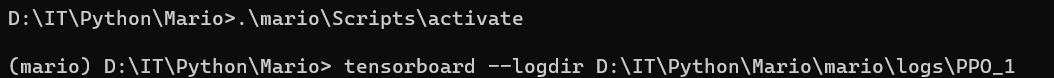

<center>

# 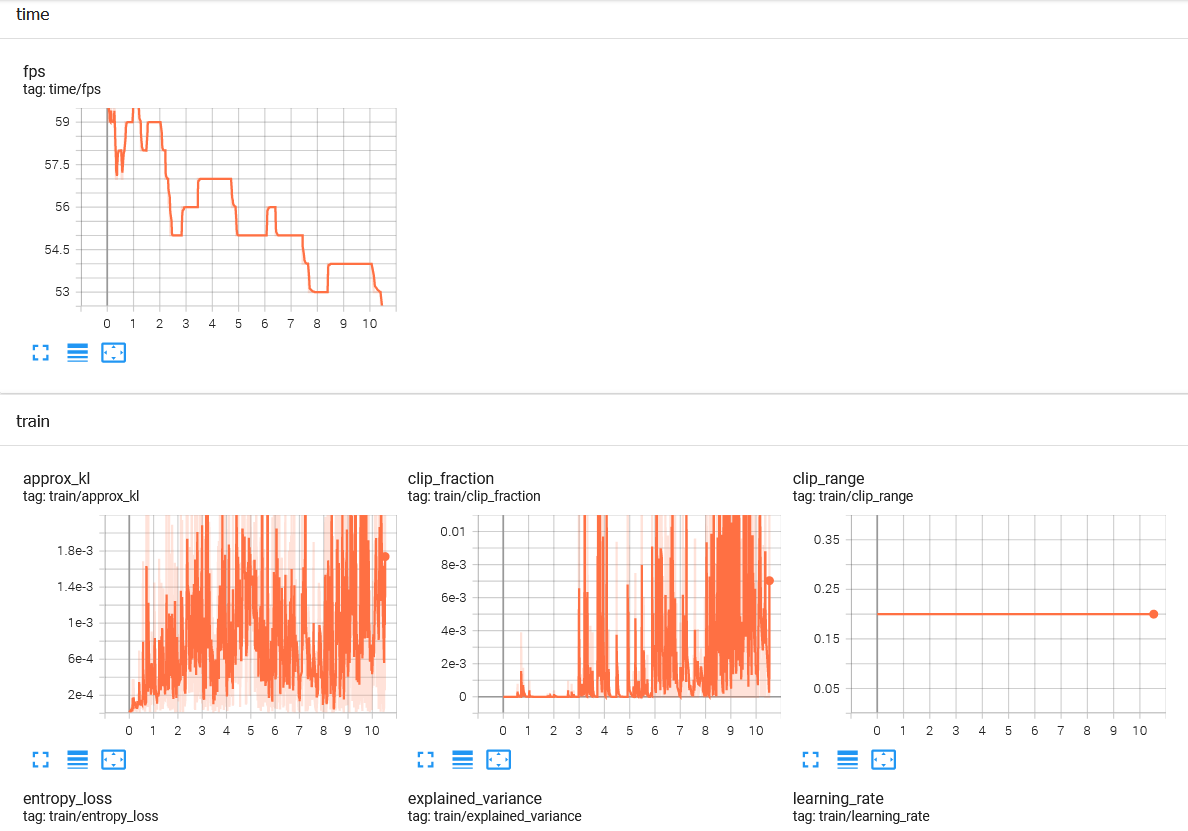

<center>

# 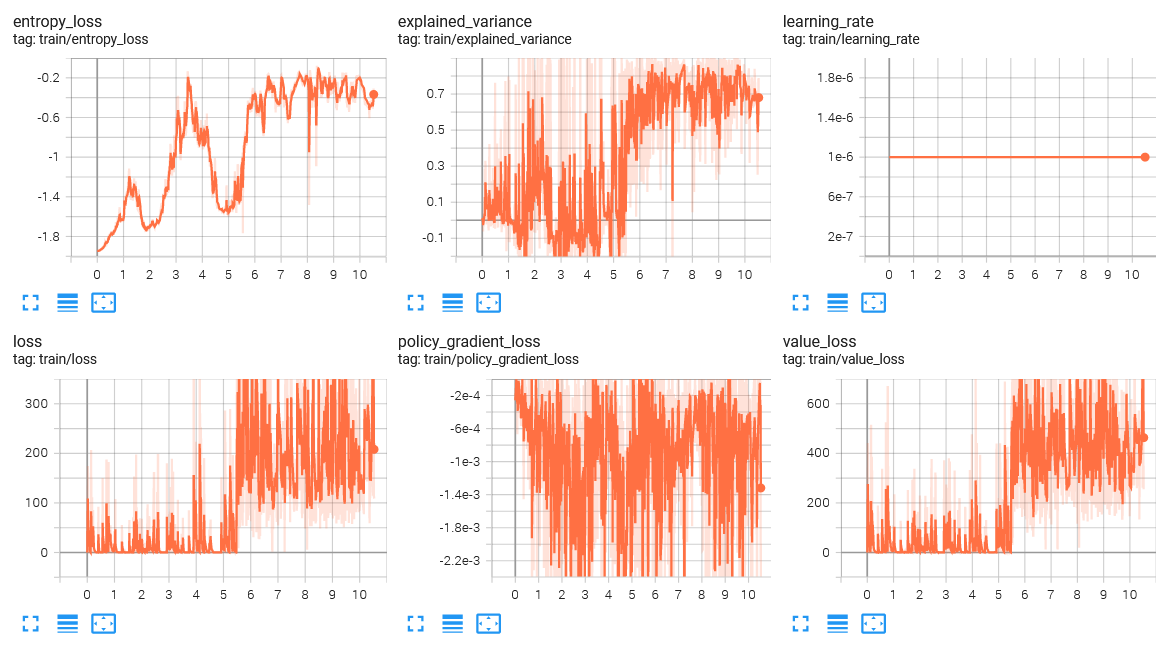

## <center> Demak grafiklarga qarab xato qilinayotgan joylarimizni topishimiz va to'g'irlashimiz mumkin
## <center> Men 2 000 000 timesteps uchun 1650Ti video kartada 11 soat vaqt sarfladim. Sizda yaxshiroq videokarta bo'lsa tezroq amalga oshirishingiz mumkin. Omad 😁

# <center> <h1>    🧑‍💻  🚀